<a href="https://colab.research.google.com/github/douyang/echonet-function-evaluation/blob/master/Calculations_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload Data

In [3]:
from google.colab import files
files.upload()

Saving 0X36D558075BB74018.mov to 0X36D558075BB74018.mov


{'0X36D558075BB74018.mov': b'\x00\x00\x00\x14ftypqt  \x00\x00\x00\x00qt  \x00\x00\x00\x08wide\x00\x01\x03\x99mdat\x00\x00\x00\x0c\x06\x00\x07\x81\xf0(\x00\x00\x03\x00@\x80\x00\x00\x00\x15\x06\x05\x11\x03\x87\xf4N\xcd\nK\xdc\xa1\x94:\xc3\xd4\x9b\x17\x1f\x00\x80\x00\x00\x08\xb9%\xb8  W\xf7\x81-<\xbb\xa8\xcb\x14\x90\x19\xdd\xe2/}\x0c\xe4\x16~y$\xce\x81\xd7)\xe2\xc6\xc6\xdcy\x06\xa1\xfe\r\xf2\xbe\xf0\xf2\x7fc\xd0Iwu\x12\xb2\xe6\xfbP\x1a\xf7\x95\xba\x15\xc6\xc5\x96\xcf\xd4\xa4\x12]\xc0\x1eQ\x9c7\x8fPR/\x958\xd0\x9a\xcf\xe8\x9c\xb0As\xd7G<\xa5\x0e\x1dtpRq\xca\xf4\x8e]F\x11\x16\x95\xc5\x08\xfe\x83>.\x98\xfcz\xdf\xcd\x1b\x8eTn?\xea\x13\x12\xea\x95:\xd7\xd3\xd0f-\xa1n\x80~8:\xc4\r<\xa1\xd7\x01\xe0HOEId4\x90=\xa0G\x9a\xea+i\xc9\x16D#/1\xc6\xfa\x8b\x9b\xdd(\x1bJ\xbe7\xa0\x9aN\xaddD\xaa\xa7\x86\xc7\xb5pa\xde\xe9\xd3_h\x87$\xaf\xfc\xcersc\x02\x0b\xd0\x9dc\x00r\xf0_\x9c\xae\x19C\xd4d\xfe\x1f\xcc\xd1O\xdb\x9e\x7f\xdc\xd0\xf3\x92QF\xc1@+c\x9b\xe7\xf4!\xc0\xc9rZ5[\x17N\x14\xf6\xb1\xfby$\xb2S\xc3\xecJ\x

# Mount Drive

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

KeyboardInterrupt: ignored

# Generating Image Samples

In [15]:
from google.colab.patches import cv2_imshow
import os
import cv2

In [ ]:
!rm -rf /content/frames
!rm -rf /content/output

In [1]:
!mkdir /content/frames
!mkdir /content/output

# First Crop Code

In [16]:
def getSpecificFrameAndCrop(dataPath, vidPath, frameNumber):
  vidName = os.path.basename(vidPath)
  if (os.path.exists(vidPath)):
    cap = cv2.VideoCapture(vidPath)
    cap.set(1, frameNumber)
    ret, frame = cap.read()
    outputPath = dataPath + "frames/" + vidName + "/" + str(frameNumber) + ".png"
    h, w, c = frame.shape

    makeDirectories(dataPath, vidName)
    # Starting Coords
    x1 = 0
    y1 = 0
    
    # Ending Coord
    x2 = 112
    y2 = 112
    # Crop
    crop = frame[x1:x2, y1:y2]
    cv2.imwrite(outputPath, crop)

getSpecificFrameAndCrop("/content/",  "/content/0X36D558075BB74018.mov", 19 )

NameError: ignored

In [ ]:
# Second Crop Test

In [17]:
import cv2

videopath = "/content/0X36D558075BB74018.mov"

cap= cv2.VideoCapture(videopath)

i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('/content/frames/frame'+str(i)+'.png',frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()


# Insert mask code

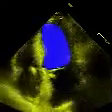

-1

In [20]:
import numpy as np
import cv2
from PIL import Image

image = "/content/frames/frame19.png"
# original = Image.open(test_image)

# width, height = original.size

image = cv2.imread(image)
h, w, c = image.shape

# Starting Coords
x1 = 0
y1 = 0

# Ending Coords
x2 = round(w/2)
y2 = h

# Crop
crop = image[y1:y2, x1:x2]
cv2_imshow(crop)

# Save Image
cv2.imwrite("/content/output/image.png", crop)

cv2.waitKey(0)

# Get all of the coordinates of the edge of the segmented mask

Number of points:  123


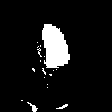

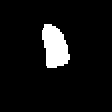

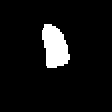

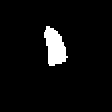

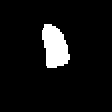

In [21]:
import cv2
import numpy as np

# read image
img = cv2.imread('/content/output/image.png')

# convert to hsv color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
kernel = np.ones((5,5),np.uint8)

# set lower and upper bounds on blue color
lower = (0,90,200)
upper = (150,255,255)

# threshold and invert so hexagon is white on black background
thresh = cv2.inRange(hsv, lower, upper);
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
erosion = cv2.erode(closing,kernel,iterations = 1)
dilation = cv2.dilate(erosion,kernel,iterations = 1)
# blur = cv2.GaussianBlur(closing,(5,5),0)

# get contours
result = np.zeros_like(img)
contours = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = contours[0] if len(contours) == 2 else contours[1]


points = []
# list contour points
for pt in contours:
    for i in pt:
      for coord in i:
        points.append(coord)

print("Number of points: ", len(points))
# show thresh and contour  
cv2_imshow(thresh)
cv2_imshow(opening)
cv2_imshow(closing)
cv2_imshow(erosion)
cv2_imshow(dilation)
# cv2_imshow(blur)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
for point in points:
  print(point)

[44 24]
[44 25]
[44 26]
[44 27]
[43 28]
[43 29]
[42 30]
[42 31]
[42 32]
[42 33]
[42 34]
[42 35]
[42 36]
[42 37]
[42 38]
[42 39]
[43 39]
[44 40]
[44 41]
[44 42]
[44 43]
[44 44]
[44 45]
[44 46]
[44 47]
[45 47]
[46 48]
[46 49]
[46 50]
[46 51]
[46 52]
[46 53]
[46 54]
[46 55]
[46 56]
[46 57]
[46 58]
[46 59]
[46 60]
[46 61]
[46 62]
[46 63]
[46 64]
[46 65]
[47 66]
[47 67]
[48 67]
[49 67]
[50 67]
[51 67]
[52 67]
[53 67]
[54 67]
[55 67]
[56 67]
[56 66]
[57 65]
[58 65]
[59 65]
[60 65]
[61 65]
[62 65]
[63 65]
[63 64]
[64 63]
[65 63]
[66 63]
[67 63]
[67 62]
[67 61]
[67 60]
[68 59]
[69 59]
[69 58]
[69 57]
[69 56]
[69 55]
[69 54]
[68 54]
[67 53]
[67 52]
[67 51]
[67 50]
[67 49]
[67 48]
[67 47]
[67 46]
[67 45]
[66 44]
[65 43]
[65 42]
[65 41]
[65 40]
[64 40]
[63 39]
[63 38]
[63 37]
[63 36]
[63 35]
[63 34]
[62 34]
[61 33]
[61 32]
[60 32]
[59 31]
[59 30]
[59 29]
[58 29]
[57 28]
[56 28]
[55 27]
[55 26]
[54 26]
[53 26]
[52 26]
[51 25]
[51 24]
[50 24]
[49 24]
[48 24]
[47 24]
[46 24]
[45 24]


# Finding maximum distance between points(Heuristic 1)

In [ ]:
import itertools, math

distance = 0
x1, x2, y1, y2 = 0, 0, 0, 0

for p1,p2 in itertools.combinations(points,2):
  latest_distance = math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )
  if latest_distance > distance:
    distance = latest_distance

    x1=p1[0]
    x2=p2[0]
    y1=p1[1]
    y2=p2[1]

print("Max distance: ", distance)
print(x1)
print(x2)
print(y1)
print(y2)


Max distance:  51.10772935672255
49
75
17
61


# Top 5 and Bottom 5 Analysis(Heuristic 2)

In [23]:
# Minimum and Maximum Y Coord
maxY = max(points, key = lambda point: point[1])
minY = min(points, key = lambda point: point[1])

# MinY and MaxY With the limits
minYWith5 = minY[1] + 5
maxYWithout5 = maxY[1] - 5

# Creating these arrays
minYWith5Arr = []
maxYWithout5Arr = []

# Finding these points
for point in points:
  if point[1] == minYWith5:
    minYWith5Arr.append(point)
  elif point[1] == maxYWithout5:
    maxYWithout5Arr.append(point)

# Average X Coordinates
averageTopX = round((minYWith5Arr[0][0] + minYWith5Arr[-1][0])/2)
averageBottomX = round((maxYWithout5Arr[0][0] + maxYWithout5Arr[-1][0])/2)

# Creating these arrays
averageTopXArr = []
averageBottomXArr = []

# Finding these points
for point in points:
  if point[0] == averageTopX:
    averageTopXArr.append(point)
  elif point[0] == averageBottomX:
    averageBottomXArr.append(point)

# Sorting Arrs
averageTopXArr.sort(key=lambda point: point[1])
averageBottomXArr.sort(key=lambda point: point[1])
averageBottomXArr.reverse()

# Finding Min Top and Max Botpp,
TopCoord = averageTopXArr[0]
BottomCoord = averageBottomXArr[0]

print(TopCoord, BottomCoord)
x1, y1 = TopCoord
x2, y2 = BottomCoord

[50 24] [56 67]


# Calculate weighted average

In [24]:
import math

# parallel_dist = distance/21

weighted_avg = []

for n in range(1, 21, 1):
  x_perpendicular = (((n*x1)+(21-n)*(x2))/21)
  y_perpendicular = (((n*y1)+(21-n)*(y2))/21)
  weighted_avg.append([x_perpendicular, y_perpendicular])

print(weighted_avg)

[[55.714285714285715, 64.95238095238095], [55.42857142857143, 62.904761904761905], [55.142857142857146, 60.857142857142854], [54.857142857142854, 58.80952380952381], [54.57142857142857, 56.76190476190476], [54.285714285714285, 54.714285714285715], [54.0, 52.666666666666664], [53.714285714285715, 50.61904761904762], [53.42857142857143, 48.57142857142857], [53.142857142857146, 46.523809523809526], [52.857142857142854, 44.476190476190474], [52.57142857142857, 42.42857142857143], [52.285714285714285, 40.38095238095238], [52.0, 38.333333333333336], [51.714285714285715, 36.285714285714285], [51.42857142857143, 34.23809523809524], [51.142857142857146, 32.19047619047619], [50.857142857142854, 30.142857142857142], [50.57142857142857, 28.095238095238095], [50.285714285714285, 26.047619047619047]]


# Draw a line given slope and intercept coordinates

7.166666666666667


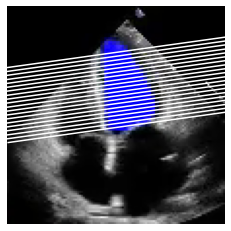

In [ ]:
import matplotlib.pyplot as plt
import random

image = Image.open("/content/output/image.png")

def find_second_point(slope, x0, y0):
    # this function returns a point which belongs to the line that has the slope 
    # inserted by the user and that intercepts the point (x0,y0) inserted by the user
    q = y0 - (slope*x0)  # calculate q
    new_x1 = x0 + random.randint(x0,x0+10)  
    new_y1 = (slope*new_x1) + q  
    new_x2 = x0 - random.randint(x0,x0+10)  
    new_y2 = (slope*new_x2) + q

    return new_x1, new_y1, new_x2, new_y2   

slope = (y2-y1)/(x2-x1)
print(slope)
perp_slope = -1/slope
for i in weighted_avg:
  x_intercept = i[0]
  y_intercept = i[1]

  new_x1, new_y1,new_x2, new_y2 = find_second_point(perp_slope , x_intercept, y_intercept)

  plt.plot((new_x2, new_x1),(new_y2, new_y1), c='w')

  plt.axis('off')
  plt.imshow(image)

plt.savefig('/content/output/lined.png', transparent=True, bbox_inches='tight', pad_inches = 0)

In [ ]:
import PIL
from PIL import Image

image = PIL.Image.open("/content/output/image.png")

width, height = image.size

basewidth = width
img = Image.open("/content/output/lined.png")

wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
img.save("/content/output/resized_image.png")

FileNotFoundError: ignored

# Create transparent crop

In [ ]:
import cv2
import numpy as np

image = cv2.imread('/content/output/resized_image.png', -1)

mask = np.zeros(image.shape, dtype=np.uint8)
roi_corners = np.array([points], dtype=np.int32)

channel_count = image.shape[2]  # i.e. 3 or 4 depending on your image
ignore_mask_color = (255,)*channel_count
cv2.fillPoly(mask, roi_corners, ignore_mask_color)

# apply the mask
masked_image = cv2.bitwise_and(image, mask)

# save the result
cv2.imwrite('/content/output/image_masked.png', masked_image)

True

# Combine both images

In [ ]:
from PIL import Image

import numpy as np

img = Image.open("/content/output/image_masked.png")

background = Image.open("/content/output/image.png")

background.paste(img, (0, 0), img)
background.save('/content/output/final.png',"PNG")

# Draw final max line

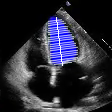

[221 182 175]


In [ ]:
image = cv2.imread('/content/output/final.png') 

height = image.shape[0]
width = image.shape[1]

cv2.line(image, (x1,y1), (x2,y2), (255, 255, 255), 1)
cv2_imshow(image)

print(image[x2, y2])

cv2.imwrite("/content/output/output.png", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Find All Mask White points

In [25]:
# Prechosen slope
slope = (y2-y1)/(x2-x1)
perp_slope = -1/slope

# Intercept slope
def calcExpectedIntercept(x, y, slope):
  return slope*x - y

# Partitions grid to two halvess
val = min(calcExpectedIntercept(x1, y1, slope), calcExpectedIntercept(x2, y2, slope))

# Points on lower half
lowerIntercept = []
# Points on higher half
higherIntercept = []

# Partitions points into two halves
for point in points:
  x, y = point
  x = int(x)
  y = int(y)
  expectedVal = calcExpectedIntercept(x, y, slope)

  if expectedVal > val:
    higherIntercept.append([x, y])
  else:
    lowerIntercept.append([x, y])

print(higherIntercept)
print(lowerIntercept)

# # Gets rid of initial points
if [x1, y1] in lowerIntercept:
  index = lowerIntercept.index([x1, y1])
  lowerIntercept = lowerIntercept[index:] + lowerIntercept[0:index]
  lowerIntercept = lowerIntercept[1:-1]
else:
  index = higherIntercept.index([x1, y1])
  higherIntercept = higherIntercept[index:] + higherIntercept[0:index]
  higherIntercept = higherIntercept[1:-1]

[[56, 66], [57, 65], [58, 65], [59, 65], [60, 65], [61, 65], [62, 65], [63, 65], [63, 64], [64, 63], [65, 63], [66, 63], [67, 63], [67, 62], [67, 61], [67, 60], [68, 59], [69, 59], [69, 58], [69, 57], [69, 56], [69, 55], [69, 54], [68, 54], [67, 53], [67, 52], [67, 51], [67, 50], [67, 49], [67, 48], [67, 47], [67, 46], [67, 45], [66, 44], [65, 43], [65, 42], [65, 41], [65, 40], [64, 40], [63, 39], [63, 38], [63, 37], [63, 36], [63, 35], [63, 34], [62, 34], [61, 33], [61, 32], [60, 32], [59, 31], [59, 30], [59, 29], [58, 29], [57, 28], [56, 28], [55, 27], [55, 26], [54, 26], [53, 26], [52, 26], [51, 25], [51, 24]]
[[44, 24], [44, 25], [44, 26], [44, 27], [43, 28], [43, 29], [42, 30], [42, 31], [42, 32], [42, 33], [42, 34], [42, 35], [42, 36], [42, 37], [42, 38], [42, 39], [43, 39], [44, 40], [44, 41], [44, 42], [44, 43], [44, 44], [44, 45], [44, 46], [44, 47], [45, 47], [46, 48], [46, 49], [46, 50], [46, 51], [46, 52], [46, 53], [46, 54], [46, 55], [46, 56], [46, 57], [46, 58], [46, 59]

# Simpson's Method

In [39]:
def getDistance(point1, point2):
  return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def getSlope(point1, point2):
  if ((point1[0] == point2[0])):
    return -333
  return (point1[1] - point2[1])/(point1[0] - point2[0])

# Indexing
lowerIndex = 0
higherIndex = 0

# Make sure its from top to bottom direction
if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
  weighted_avg = weighted_avg[::-1]

# Make sure its from top to bottom direction
if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
    higherIntercept = higherIntercept[::-1]

# Make sure its from top to bottom direction
if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
    lowerIntercept = lowerIntercept[::-1]

higherInterceptAveragePoints = []
lowerInterceptAveragePoints = []

lowerIndex = 0
higherIndex = 0


for averagePoint in weighted_avg:
  condition = True
  while condition:
    print(higherIndex)

    point = higherIntercept[higherIndex]
    new_slope = getSlope(point, averagePoint)
    higherIndex += 1


    if new_slope>perp_slope:
      higherInterceptAveragePoints.append(point)
      condition = False

for averagePoint in weighted_avg:
  condition = True
  while condition:
    point = lowerIntercept[lowerIndex]
    new_slope = getSlope(point, averagePoint)
    lowerIndex += 1

    if new_slope<perp_slope:
      lowerInterceptAveragePoints.append(point)
      condition = False

# print(lowerInterceptAveragePoints)
# print(higherInterceptAveragePoints)

# for i in range(len(lowerInterceptAveragePoints)):
#   print(getSlope(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i]), lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53


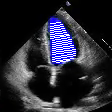

In [ ]:
image = cv2.imread('/content/output/image.png') 

height = image.shape[0]
width = image.shape[1]

for i in range(len(lowerInterceptAveragePoints)): 
  cv2.line(image, tuple(lowerInterceptAveragePoints[i]),  tuple(higherInterceptAveragePoints[i]), (255, 255, 255), 1)
cv2_imshow(image)

cv2.imwrite("/content/output/final.png", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Volume Calculation

In [27]:
distance = getDistance([x1, y1], [x2, y2])
parallelSeperationDistance = distance/21

volume = 0

for i in range(len(lowerInterceptAveragePoints)):
  diameter = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  radius = diameter/2
  diskVolume = math.pi * radius**2 * parallelSeperationDistance
  volume += diskVolume

print(volume)

12891.161992277795


# Prolate Ellipsoid Model (Single Ellipsoid Method)

In [ ]:
long_axis_length = getDistance([x1, y1], [x2, y2])
parallelSeperationDistance = distance/21

# Manual Area Calc
area = 0

for i in range(len(lowerInterceptAveragePoints)):
  length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  diskArea = length * parallelSeperationDistance
  area += diskArea

volume = 0.85 * area**2 / length

print(volume)

119632.38784968079


# Prolate Ellipsoid Model (Biplane Area Length)

In [ ]:
# Long axis Length
long_axis_length = getDistance([x1, y1], [x2, y2])

# Storing all perp lens
lengthArr = []

for i in range(len(lowerInterceptAveragePoints)):
  length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  lengthArr.append(length)

# 3 diff heuristics
averageLength = sum(lengthArr)/len(lengthArr)
maxLength = max(lengthArr)
midLength = lengthArr[len(lengthArr)//2]

# Volume Calc
volume = math.pi/6 * midLength**2 * long_axis_length

print(volume)

20272.45516113132


# Bullet Method


In [ ]:
# Long axis Length
long_axis_length = getDistance([x1, y1], [x2, y2])

# Mid Values
midIndex = len(lengthArr)//2
midLength = getDistance(lowerInterceptAveragePoints[midIndex], higherInterceptAveragePoints[midIndex])

# Volume Calc
volume = 5/6 * midLength**2 * long_axis_length

print(volume)

32264.61447502856


# Will become local file


In [63]:
import cv2
import numpy as np
import math

# Gets all the contours for certain image
def obtainContourPoints(path):
  # read image
  img = cv2.imread(path)

  # convert to hsv color space
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  kernel = np.ones((5,5),np.uint8)

  # set lower and upper bounds on blue color
  lower = (0,90,200)
  upper = (150,255,255)

  # threshold and invert so hexagon is white on black background
  thresh = cv2.inRange(hsv, lower, upper);
  opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
  closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
  erosion = cv2.erode(closing,kernel,iterations = 1)
  dilation = cv2.dilate(erosion,kernel,iterations = 1)
  # blur = cv2.GaussianBlur(closing,(5,5),0)

  # get contours
  result = np.zeros_like(img)
  contours = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  contours = contours[0] if len(contours) == 2 else contours[1]

  # Gets all contour points
  points = []
  for pt in contours:
      for i in pt:
        for coord in i:
          points.append(coord.tolist())
  
  # Resets
  cv2.waitKey(0)
  cv2.destroyAllWindows()

  return points

# Finds points for main contour line
def getTopAndBottomCoords(points):
  # Minimum and Maximum Y Coord
  maxY = max(points, key = lambda point: point[1])
  minY = min(points, key = lambda point: point[1])

  # MinY and MaxY With the limits
  minYWith5 = minY[1] + 5
  maxYWithout5 = maxY[1] - 5

  # Creating these arrays
  minYWith5Arr = []
  maxYWithout5Arr = []

  # Finding these points
  for point in points:
    if point[1] == minYWith5:
      minYWith5Arr.append(point)
    elif point[1] == maxYWithout5:
      maxYWithout5Arr.append(point)

  # Average X Coordinates
  averageTopX = round((minYWith5Arr[0][0] + minYWith5Arr[-1][0])/2)
  averageBottomX = round((maxYWithout5Arr[0][0] + maxYWithout5Arr[-1][0])/2)

  # Creating these arrays
  averageTopXArr = []
  averageBottomXArr = []

  # Finding these points
  for point in points:
    if point[0] == averageTopX:
      averageTopXArr.append(point)
    elif point[0] == averageBottomX:
      averageBottomXArr.append(point)

  # Sorting Arrs
  averageTopXArr.sort(key=lambda point: point[1])
  averageBottomXArr.sort(key=lambda point: point[1])
  averageBottomXArr.reverse()

  # Finding Min Top and Max Botpp,
  TopCoord = averageTopXArr[0]
  BottomCoord = averageBottomXArr[0]

  x1, y1 = TopCoord
  x2, y2 = BottomCoord

  return (x1, y1, x2, y2)

def getXsAndYsWithSlope(higherInterceptPoints, lowerIntercept, slope):
  print(higherInterceptPoints)

# Create the 20 equally spaced points
def getWeightedAveragePoints(x1, y1, x2, y2, number):
  weighted_avg = []

  for n in range(1, number+1, 1):
    x_perpendicular = (((n*x1)+(number+1-n)*(x2))/(number+1))
    y_perpendicular = (((n*y1)+(number+1-n)*(y2))/(number+1))
    weighted_avg.append([x_perpendicular, y_perpendicular])

  return weighted_avg

# Intercept slope
def calcExpectedIntercept(x, y, slope):
  return slope*x - y

def splitPoints(x1, y1, x2, y2, slope, points):
  # Calculate perpendicular slope
  perp_slope = -1/slope
  val = 0

  # Partitions grid to two halvess
  val = min(calcExpectedIntercept(x1, y1, slope), calcExpectedIntercept(x2, y2, slope))
  
  # Points on lower half
  lowerIntercept = []
  # Points on higher half
  higherIntercept = []

  # Partitions points into two halves
  for point in points:
    x, y = point
    x = int(x)
    y = int(y)
    expectedVal = calcExpectedIntercept(x, y, slope)

    if expectedVal > val:
      higherIntercept.append([x, y])
    else:
      lowerIntercept.append([x, y])
    
  # Gets rid of initial points
  if [x1, y1] in lowerIntercept:
    index = lowerIntercept.index([x1, y1])
    lowerIntercept = lowerIntercept[index:] + lowerIntercept[0:index]
    lowerIntercept = lowerIntercept[1:-1]
  else:
    index = higherIntercept.index([x1, y1])
    higherIntercept = higherIntercept[index:] + higherIntercept[0:index]
    higherIntercept = higherIntercept[1:-1]

  lowerIntercept = [[x1, y1]] + lowerIntercept
  higherIntercept = [[x2, y2]] + higherIntercept

  return (lowerIntercept, higherIntercept)

# Distance Between 2 Pointss
def getDistance(point1, point2):
  return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

# Slope between points 
def getSlope(point1, point2):
  if ((point1[0] == point2[0])):
    return -333
  return (point1[1] - point2[1])/(point1[0] - point2[0])

def findCorrespondingMaskPoints(weighted_avg, lowerIntercept, higherIntercept, x1, y1, x2, y2, slope):
  # Calculate perpendicular slope
  perp_slope = -1/slope

  # Indexing
  lowerIndex = 0
  higherIndex = 0

  # Make sure its from top to bottom direction
  if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
    weighted_avg = weighted_avg[::-1]

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
      higherIntercept = higherIntercept[::-1]

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
      lowerIntercept = lowerIntercept[::-1]

  higherInterceptAveragePoints = []
  lowerInterceptAveragePoints = []

  for averagePoint in weighted_avg:
    condition = True
    while condition:
      point = higherIntercept[higherIndex]
      new_slope = getSlope(point, averagePoint)
      higherIndex += 1


      if new_slope>perp_slope:
        higherInterceptAveragePoints.append(point)
        condition = False

  for averagePoint in weighted_avg:
    condition = True
    while condition:
      point = lowerIntercept[lowerIndex]
      new_slope = getSlope(point, averagePoint)
      lowerIndex += 1

      if new_slope<perp_slope:
        lowerInterceptAveragePoints.append(point)
        condition = False
  
  return (lowerInterceptAveragePoints, higherInterceptAveragePoints)

def volumeSimpsonMethodCalc(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis length and perp initialzation
  distance = getDistance([x1, y1], [x2, y2])
  parallelSeperationDistance = distance/(number + 1)

  # Simpson Volume Methods
  volume = 0

  for i in range(len(lowerInterceptAveragePoints)):
    diameter = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    radius = diameter/2
    diskVolume = math.pi * radius**2 * parallelSeperationDistance
    volume += diskVolume

  return volume

def volumeSingleEllipsoidMethodCalc(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis length
  long_axis_length = getDistance([x1, y1], [x2, y2])
  parallelSeperationDistance = distance/(number + 1)

  # Simpson Area Method
  area = 0

  for i in range(len(lowerInterceptAveragePoints)):
    length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    diskArea = length * parallelSeperationDistance
    area += diskArea

  # Volume Calc
  volume = 0.85 * area**2 / length

  return volume

def volumeBiplaneAreaMethodCalc(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis Length
  long_axis_length = getDistance([x1, y1], [x2, y2])

  # Storing all perp lengths
  lengthArr = []

  for i in range(len(lowerInterceptAveragePoints)):
    length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    lengthArr.append(length)

  # 3 diff heuristics
  averageLength = sum(lengthArr)/len(lengthArr)
  maxLength = max(lengthArr)
  midLength = lengthArr[len(lengthArr)//2]

  # Volume Calc
  volume = math.pi/6 * averageLength**2 * long_axis_length

  return volume

def volumeBulletMethodCalc(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis Length
  long_axis_length = getDistance([x1, y1], [x2, y2])

  # Mid Values
  midIndex = len(lengthArr)//2
  midLength = getDistance(lowerInterceptAveragePoints[midIndex], higherInterceptAveragePoints[midIndex])

  # Volume Calc
  volume = 5/6 * midLength**2 * long_axis_length

  return volume

def calculateVolume(path, number, method = "Simpson"):
  points = obtainContourPoints(path)

  x1, y1, x2, y2 = getTopAndBottomCoords(points)
  mainLineSlope = getSlope([x1, y1], [x2, y2])
  lowerIntercept, higherIntercept = splitPoints(x1, y1, x2, y2, mainLineSlope, points)

  volumes = {}
  x1s = {}
  y1s = {}
  x2s = {}
  y2s = {}
 
  # Volumes for all 0 to 5 cases
  for i in range(0, 5, 1):
    x1, y1 = lowerIntercept[i]
    x2, y2 = higherIntercept[i]

    slope = getSlope([x1, y1], [x2, y2])
    # print([x1, y1], [x2, y2])

    
    lowerInterceptPoints, higherInterceptPoints = splitPoints(x1, y1, x2, y2, slope, points)
    print(lowerInterceptPoints)
    print(higherInterceptPoints)

    weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, number)
    lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, slope)
    
    x1s[i] = [point[0] for point in lowerInterceptAveragePoints]
    y1s[i] = [point[1] for point in lowerInterceptAveragePoints]

    x2s[i] = [point[0] for point in higherInterceptAveragePoints]
    y2s[i] = [point[1] for point in higherInterceptAveragePoints]


    if  method == "Simpson":
      volumes[i] = volumeSimpsonMethodCalc(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Single Ellipsoid":
      volumes[i] = volumeSingleEllipsoidMethodCalc(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Biplane Area":
      volumes[i] = volumeBiplaneAreaMethodCalc(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Bullet":
      volumes[i] = volumeBulletMethodCalc(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    else:
      return "Incorrect Method"
      
  return (volumes, x1s, y1s, x2s, y2s)


print(calculateVolume("/content/output/image.png", 20, method = "Simpson"))
# print(calculateVolume("/content/output/image.png", method = "Single Ellipsoid"))
# print(calculateVolume("/content/output/image.png", method = "Biplane Area"))
# print(calculateVolume("/content/output/image.png", method = "Bullet"))
 

[[50, 24], [49, 24], [48, 24], [47, 24], [46, 24], [45, 24], [44, 24], [44, 25], [44, 26], [44, 27], [43, 28], [43, 29], [42, 30], [42, 31], [42, 32], [42, 33], [42, 34], [42, 35], [42, 36], [42, 37], [42, 38], [42, 39], [43, 39], [44, 40], [44, 41], [44, 42], [44, 43], [44, 44], [44, 45], [44, 46], [44, 47], [45, 47], [46, 48], [46, 49], [46, 50], [46, 51], [46, 52], [46, 53], [46, 54], [46, 55], [46, 56], [46, 57], [46, 58], [46, 59], [46, 60], [46, 61], [46, 62], [46, 63], [46, 64], [46, 65], [47, 66], [47, 67], [48, 67], [49, 67], [50, 67], [51, 67], [52, 67], [53, 67], [54, 67], [55, 67]]
[[56, 67], [56, 66], [57, 65], [58, 65], [59, 65], [60, 65], [61, 65], [62, 65], [63, 65], [63, 64], [64, 63], [65, 63], [66, 63], [67, 63], [67, 62], [67, 61], [67, 60], [68, 59], [69, 59], [69, 58], [69, 57], [69, 56], [69, 55], [69, 54], [68, 54], [67, 53], [67, 52], [67, 51], [67, 50], [67, 49], [67, 48], [67, 47], [67, 46], [67, 45], [66, 44], [65, 43], [65, 42], [65, 41], [65, 40], [64, 40]

In [66]:
import cv2
import numpy as np
import math

# Gets all the contours for certain image
def obtainContourPoints(path):
  # read image
  img = cv2.imread(path)

  # convert to hsv color space
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  kernel = np.ones((5,5),np.uint8)

  # set lower and upper bounds on blue color
  lower = (0,90,200)
  upper = (150,255,255)

  # threshold and invert so hexagon is white on black background
  thresh = cv2.inRange(hsv, lower, upper);
  opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
  closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
  erosion = cv2.erode(closing,kernel,iterations = 1)
  dilation = cv2.dilate(erosion,kernel,iterations = 1)
  # blur = cv2.GaussianBlur(closing,(5,5),0)

  # get contours
  result = np.zeros_like(img)
  contours = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  contours = contours[0] if len(contours) == 2 else contours[1]

  # Gets all contour points
  points = []
  for pt in contours:
      for i in pt:
        for coord in i:
          points.append(coord.tolist())
  
  # Resets
  cv2.waitKey(0)
  cv2.destroyAllWindows()

  return points

# Finds points for main contour line
def getTopAndBottomCoords(points):
  # Minimum and Maximum Y Coord
  maxY = max(points, key = lambda point: point[1])
  minY = min(points, key = lambda point: point[1])

  # MinY and MaxY With the limits
  minYWith5 = minY[1] + 5
  maxYWithout5 = maxY[1] - 5

  # Creating these arrays
  minYWith5Arr = []
  maxYWithout5Arr = []

  # Finding these points
  for point in points:
    if point[1] == minYWith5:
      minYWith5Arr.append(point)
    elif point[1] == maxYWithout5:
      maxYWithout5Arr.append(point)

  # Average X Coordinates
  averageTopX = round((minYWith5Arr[0][0] + minYWith5Arr[-1][0])/2)
  averageBottomX = round((maxYWithout5Arr[0][0] + maxYWithout5Arr[-1][0])/2)

  # Creating these arrays
  averageTopXArr = []
  averageBottomXArr = []

  # Finding these points
  for point in points:
    if point[0] == averageTopX:
      averageTopXArr.append(point)
    elif point[0] == averageBottomX:
      averageBottomXArr.append(point)

  # Sorting Arrs
  averageTopXArr.sort(key=lambda point: point[1])
  averageBottomXArr.sort(key=lambda point: point[1])
  averageBottomXArr.reverse()

  # Finding Min Top and Max Botpp,
  TopCoord = averageTopXArr[0]
  BottomCoord = averageBottomXArr[0]

  x1, y1 = TopCoord
  x2, y2 = BottomCoord

  return (x1, y1, x2, y2)

def getXsAndYsWithSlope(higherInterceptPoints, lowerIntercept, slope):
  print(higherInterceptPoints)

# Create the 20 equally spaced points
def getWeightedAveragePoints(x1, y1, x2, y2, number):
  weighted_avg = []

  for n in range(1, number+1, 1):
    x_perpendicular = (((n*x1)+(number+1-n)*(x2))/(number+1))
    y_perpendicular = (((n*y1)+(number+1-n)*(y2))/(number+1))
    weighted_avg.append([x_perpendicular, y_perpendicular])

  return weighted_avg

# Intercept slope
def calcExpectedIntercept(x, y, slope):
  return slope*x - y

def splitPoints(x1, y1, x2, y2, slope, points):
  # Calculate perpendicular slope
  perp_slope = -1/slope
  val = 0

  # Partitions grid to two halvess
  val = min(calcExpectedIntercept(x1, y1, slope), calcExpectedIntercept(x2, y2, slope))
  
  # Points on lower half
  lowerIntercept = []
  # Points on higher half
  higherIntercept = []

  # Partitions points into two halves
  for point in points:
    x, y = point
    x = int(x)
    y = int(y)
    expectedVal = calcExpectedIntercept(x, y, slope)

    if expectedVal > val:
      higherIntercept.append([x, y])
    else:
      lowerIntercept.append([x, y])
    
  # Gets rid of initial points
  if [x1, y1] in lowerIntercept:
    index = lowerIntercept.index([x1, y1])
    lowerIntercept = lowerIntercept[index:] + lowerIntercept[0:index]
    lowerIntercept = lowerIntercept[1:-1]
  else:
    index = higherIntercept.index([x1, y1])
    higherIntercept = higherIntercept[index:] + higherIntercept[0:index]
    higherIntercept = higherIntercept[1:-1]

  lowerIntercept = [[x1, y1]] + lowerIntercept
  higherIntercept = [[x2, y2]] + higherIntercept

  return (lowerIntercept, higherIntercept)

# Distance Between 2 Pointss
def getDistance(point1, point2):
  return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

# Slope between points 
def getSlope(point1, point2):
  if ((point1[0] == point2[0])):
    return -333
  return (point1[1] - point2[1])/(point1[0] - point2[0])

def findCorrespondingMaskPoints(weighted_avg, lowerIntercept, higherIntercept, x1, y1, x2, y2, slope):
  # Calculate perpendicular slope
  perp_slope = -1/slope

  # Indexing
  lowerIndex = 0
  higherIndex = 0

  # Make sure its from top to bottom direction
  if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
    weighted_avg = weighted_avg[::-1]

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
      higherIntercept = higherIntercept[::-1]

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
      lowerIntercept = lowerIntercept[::-1]

  higherInterceptAveragePoints = []
  lowerInterceptAveragePoints = []

  for averagePoint in weighted_avg:
    condition = True
    while condition:
      point = higherIntercept[higherIndex]
      new_slope = getSlope(point, averagePoint)
      higherIndex += 1


      if new_slope>perp_slope:
        higherInterceptAveragePoints.append(point)
        condition = False

  for averagePoint in weighted_avg:
    condition = True
    while condition:
      point = lowerIntercept[lowerIndex]
      new_slope = getSlope(point, averagePoint)
      lowerIndex += 1

      if new_slope<perp_slope:
        lowerInterceptAveragePoints.append(point)
        condition = False
  
  return (lowerInterceptAveragePoints, higherInterceptAveragePoints)

def volumeSimpsonMethodCalc(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis length and perp initialzation
  distance = getDistance([x1, y1], [x2, y2])
  parallelSeperationDistance = distance/(number + 1)

  # Simpson Volume Methods
  volume = 0

  for i in range(len(lowerInterceptAveragePoints)):
    diameter = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    radius = diameter/2
    diskVolume = math.pi * radius**2 * parallelSeperationDistance
    volume += diskVolume

  return volume

def volumeSingleEllipsoidMethodCalc(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis length
  long_axis_length = getDistance([x1, y1], [x2, y2])
  parallelSeperationDistance = distance/(number + 1)

  # Simpson Area Method
  area = 0

  for i in range(len(lowerInterceptAveragePoints)):
    length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    diskArea = length * parallelSeperationDistance
    area += diskArea

  # Volume Calc
  volume = 0.85 * area**2 / length

  return volume

def volumeBiplaneAreaMethodCalc(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis Length
  long_axis_length = getDistance([x1, y1], [x2, y2])

  # Storing all perp lengths
  lengthArr = []

  for i in range(len(lowerInterceptAveragePoints)):
    length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    lengthArr.append(length)

  # 3 diff heuristics
  averageLength = sum(lengthArr)/len(lengthArr)
  maxLength = max(lengthArr)
  midLength = lengthArr[len(lengthArr)//2]

  # Volume Calc
  volume = math.pi/6 * averageLength**2 * long_axis_length

  return volume

def volumeBulletMethodCalc(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis Length
  long_axis_length = getDistance([x1, y1], [x2, y2])

  # Mid Values
  midIndex = len(lengthArr)//2
  midLength = getDistance(lowerInterceptAveragePoints[midIndex], higherInterceptAveragePoints[midIndex])

  # Volume Calc
  volume = 5/6 * midLength**2 * long_axis_length

  return volume

def calculateVolume(path, number, method = "Simpson"):
  points = obtainContourPoints(path)

  x1, y1, x2, y2 = getTopAndBottomCoords(points)
  mainLineSlope = getSlope([x1, y1], [x2, y2])
  lowerIntercept, higherIntercept = splitPoints(x1, y1, x2, y2, mainLineSlope, points)

  volumes = {}
  x1s = {}
  y1s = {}
  x2s = {}
  y2s = {}
 
  # Volumes for all 0 to 5 cases
  for i in range(-5, 5, 1):
    x1, y1 = lowerIntercept[i]
    x2, y2 = higherIntercept[i]

    slope = getSlope([x1, y1], [x2, y2])
    # print([x1, y1], [x2, y2])

    p1Index = points.index([x1, y1])
    p2Index = points.index([x2, y2])

    lowerIndex = min(p1Index, p2Index)
    higherIndex = max(p1Index, p2Index)

    higherInterceptPoints = points[lowerIndex:higherIndex]
    lowerInterceptPoints = points[higherIndex:] + points[:lowerIndex]

    # if (i<0):
    #   lowerInterceptPoints, higherInterceptPoints = higherInterceptPoints, lowerInterceptPoints

    print(lowerInterceptPoints)
    print(higherInterceptPoints)

    print("\n \n")
    # if lowerInterceptPoints[0][]
    # lowerInterceptPoints, higherInterceptPoints = splitPoints(x1, y1, x2, y2, slope, points)

    weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, number)
    lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, slope)
    
    x1s[i] = [point[0] for point in lowerInterceptAveragePoints]
    y1s[i] = [point[1] for point in lowerInterceptAveragePoints]

    x2s[i] = [point[0] for point in higherInterceptAveragePoints]
    y2s[i] = [point[1] for point in higherInterceptAveragePoints]


    if  method == "Simpson":
      volumes[i] = volumeSimpsonMethodCalc(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Single Ellipsoid":
      volumes[i] = volumeSingleEllipsoidMethodCalc(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Biplane Area":
      volumes[i] = volumeBiplaneAreaMethodCalc(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Bullet":
      volumes[i] = volumeBulletMethodCalc(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    else:
      return "Incorrect Method"
      
  return (volumes, x1s, y1s, x2s, y2s)


print(calculateVolume("/content/output/image.png", 20, method = "Simpson"))
# print(calculateVolume("/content/output/image.png", method = "Single Ellipsoid"))
# print(calculateVolume("/content/output/image.png", method = "Biplane Area"))
# print(calculateVolume("/content/output/image.png", method = "Bullet"))
 

[[54, 26], [53, 26], [52, 26], [51, 25], [51, 24], [50, 24], [49, 24], [48, 24], [47, 24], [46, 24], [45, 24], [44, 24], [44, 25], [44, 26], [44, 27], [43, 28], [43, 29], [42, 30], [42, 31], [42, 32], [42, 33], [42, 34], [42, 35], [42, 36], [42, 37], [42, 38], [42, 39], [43, 39], [44, 40], [44, 41], [44, 42], [44, 43], [44, 44], [44, 45], [44, 46], [44, 47], [45, 47], [46, 48], [46, 49], [46, 50], [46, 51], [46, 52], [46, 53], [46, 54], [46, 55], [46, 56], [46, 57], [46, 58], [46, 59], [46, 60], [46, 61], [46, 62], [46, 63], [46, 64], [46, 65], [47, 66], [47, 67], [48, 67], [49, 67], [50, 67]]
[[51, 67], [52, 67], [53, 67], [54, 67], [55, 67], [56, 67], [56, 66], [57, 65], [58, 65], [59, 65], [60, 65], [61, 65], [62, 65], [63, 65], [63, 64], [64, 63], [65, 63], [66, 63], [67, 63], [67, 62], [67, 61], [67, 60], [68, 59], [69, 59], [69, 58], [69, 57], [69, 56], [69, 55], [69, 54], [68, 54], [67, 53], [67, 52], [67, 51], [67, 50], [67, 49], [67, 48], [67, 47], [67, 46], [67, 45], [66, 44]

In [39]:
x = [[2, 2], [1, 2], [2, 3]]
print(x.index([1, 2]))

1
